In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
class debruijn_graph():
    '''
        build debruijn graph from seq
    '''
    def __init__(self, seqs, k = 5):
        self.seqs = seqs
        self.kmers = [seq[i:i+k] for seq in seqs for i in range(len(seq) - k+1)]
        print(self.kmers)
        self.graph = nx.MultiDiGraph()
    def build_debg(self):
        for kmer in self.kmers:
            self.graph.add_edge(kmer[:-1], kmer[1:]) 
        #for edge in self.graph.edges: print(edge)
    def euler_path(self):
        bg = self.kmers[0][:-1]
        ed = self.kmers[-1][1:]
        self.graph.add_edge(ed, bg)#add_edge from ed to bg so that is eulerian
        if nx.is_eulerian(self.graph): path = [e for e in nx.eulerian_circuit(self.graph, ed)][1:]
        else: path = []
        self.graph.remove_edge(ed, bg)
        cnt = {}
        for i, e in enumerate(path):
            #print(e[0], e[1])
            if e not in cnt: cnt[e] = 0
            else:cnt[e] += 1
            self.graph[e[0]][e[1]][cnt[e]]['label'] = i
        return path
    def display_graph(self, fn):
        #display multigraph with pygraphviz
        agraph = nx.nx_agraph.to_agraph(self.graph)
        agraph.graph_attr.update(rankdir='LR')
        agraph.edge_attr['color'] = 'blue'
        agraph.node_attr['color'] = 'red'
        bg_node = agraph.get_node(self.kmers[0][:-1])
        bg_node.attr['shape'] = 'doublecircle'
        ed_node = agraph.get_node(self.kmers[-1][1:])
        ed_node.attr['shape'] = 'doublecircle'
        #for e in agraph.edges(): print(e, e.attr['label'])
        #for e in g.graph.edges: print(e, g.graph[e[0]][e[1]][0]['weight'])
        #for e in g.graph.edges: print(e, e[3]['weight'])
        agraph.layout()
        agraph.draw(fn,prog='dot') # use circo to position, write PS file
        

In [3]:
#generate kmers
ref = 'ACACATTAGAGAGTACGACGAGCCAG$'
read_len = 10
read_list = [ ref[i:i+read_len] for i in range(0,len(ref)-read_len,2)]
print(read_list)

['ACACATTAGA', 'ACATTAGAGA', 'ATTAGAGAGT', 'TAGAGAGTAC', 'GAGAGTACGA', 'GAGTACGACG', 'GTACGACGAG', 'ACGACGAGCC', 'GACGAGCCAG']


In [4]:
#build graph
g = debruijn_graph([ref], k=4)      #build graph from reference
#g = debruijn_graph(read_list, k=5) #build graph from reads set
g.build_debg()
g.euler_path()

['ACAC', 'CACA', 'ACAT', 'CATT', 'ATTA', 'TTAG', 'TAGA', 'AGAG', 'GAGA', 'AGAG', 'GAGT', 'AGTA', 'GTAC', 'TACG', 'ACGA', 'CGAC', 'GACG', 'ACGA', 'CGAG', 'GAGC', 'AGCC', 'GCCA', 'CCAG', 'CAG$']


[('ACA', 'CAC'),
 ('CAC', 'ACA'),
 ('ACA', 'CAT'),
 ('CAT', 'ATT'),
 ('ATT', 'TTA'),
 ('TTA', 'TAG'),
 ('TAG', 'AGA'),
 ('AGA', 'GAG'),
 ('GAG', 'AGT'),
 ('AGT', 'GTA'),
 ('GTA', 'TAC'),
 ('TAC', 'ACG'),
 ('ACG', 'CGA'),
 ('CGA', 'GAC'),
 ('GAC', 'ACG'),
 ('ACG', 'CGA'),
 ('CGA', 'GAG'),
 ('GAG', 'AGA'),
 ('AGA', 'GAG'),
 ('GAG', 'AGC'),
 ('AGC', 'GCC'),
 ('GCC', 'CCA'),
 ('CCA', 'CAG'),
 ('CAG', 'AG$')]

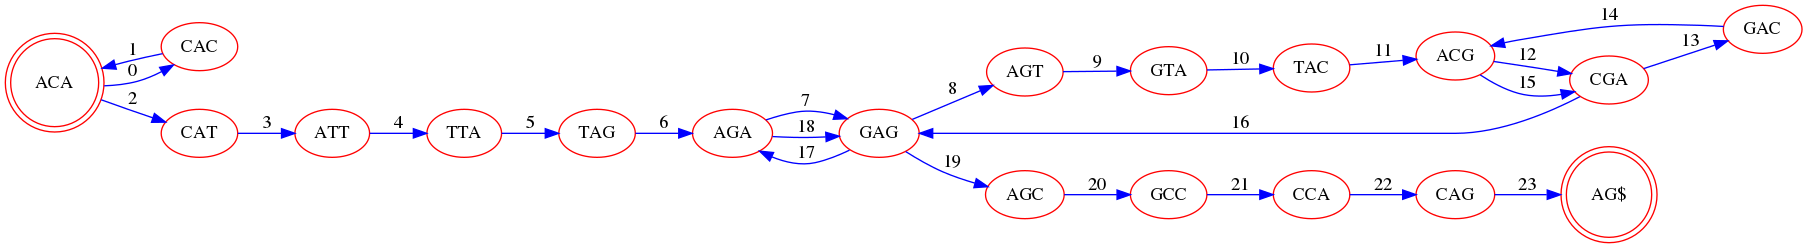

In [5]:
g.display_graph('g.png')
from IPython.display import Image
Image("g.png")